In [229]:
import numpy as np
import csv
import pandas as pd
np.random.seed(1337)
from sklearn import model_selection
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import json
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
from keras.preprocessing.sequence import pad_sequences
import re
import itertools
from collections import Counter
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.wrappers import TimeDistributed
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt

In [133]:
data=pd.read_csv('compiledData.csv')

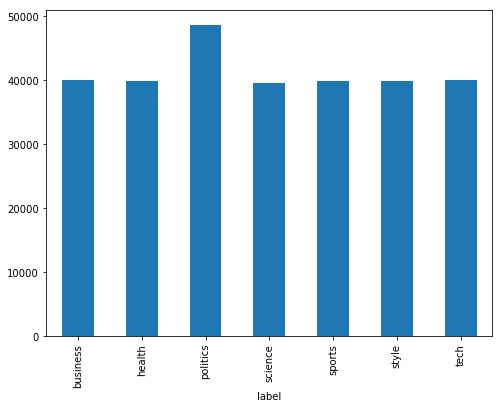

In [231]:
fig = plt.figure(figsize=(8,6))
data.groupby('label').processedText.count().plot.bar(ylim=0)
plt.show()

In [134]:
def clean_str(string):
    string = re.sub(r"https\\S*", "", string)
    string = re.sub(r"#", "", string)
    string = re.sub(r"@\\S*", "", string)
    string = re.sub(r"\\n", "", string)
    string = re.sub(r"[^a-zA-Z0-9]+'[^a-zA-Z0-9]+", "", string)
    string = re.sub(r"[^[:alnum:][:space:]'']", "", string)
    return string.strip().lower()

In [135]:
X_train, X_test, y_train, y_test = train_test_split(data.processedText, data.label, test_size=0.1, random_state=42)

In [190]:
# Convert X_train from text to data matrix
max_words = 3000
tokenizer = Tokenizer(num_words=max_words)
X_train= [clean_str(str(sent)) for sent in X_train]
tokenizer.fit_on_texts(X_train)
dictionary = tokenizer.word_index

In [191]:
def convert_text_to_index_array(text):                                                                                                                                                                                                                                                                                                             
    # one really important thing that `text_to_word_sequence` does
    # is make all texts the same length -- in this case, the length
    # of the longest text in the set.
    return [dictionary[word] for word in kpt.text_to_word_sequence(text)]

In [192]:
allWordIndices = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_train:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices.append(wordIndices)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndices = np.asarray(allWordIndices)
train_x = tokenizer.sequences_to_matrix(allWordIndices)

In [193]:
# Convert X_test from text to data matrix
X_test= [clean_str(str(sent)) for sent in X_test]
tokenizer.fit_on_texts(X_test)
dictionary = tokenizer.word_index
allWordIndices_test = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_test:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices_test.append(wordIndices)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndices_test = np.asarray(allWordIndices_test)
test_x = tokenizer.sequences_to_matrix(allWordIndices_test)

In [194]:
# Convert y to categorical data matrix
num_class=len(np.unique(y_train))
y_train_cat=y_train.factorize()[0]
train_y = keras.utils.to_categorical(y_train_cat, num_class)
y_test_cat=y_test.factorize()[0]
test_y = keras.utils.to_categorical(y_test_cat, num_class)

In [222]:
model=Sequential() 

In [223]:
model.add(Embedding(3, 10, input_length=train_x.shape[1])) 
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dropout(0.5))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [224]:
res=model.fit(train_x, train_y,batch_size=152,epochs=10,validation_split=0.5,shuffle=True)

Train on 130098 samples, validate on 130098 samples
Epoch 1/10
130098/130098 [==============================] - 130s 1ms/step - loss: 0.3281 - acc: 0.8773 - val_loss: 0.2496 - val_acc: 0.9060
Epoch 2/10
130098/130098 [==============================] - 118s 907us/step - loss: 0.2749 - acc: 0.9017 - val_loss: 0.2442 - val_acc: 0.9072
Epoch 3/10
130098/130098 [==============================] - 120s 919us/step - loss: 0.2720 - acc: 0.9031 - val_loss: 0.2430 - val_acc: 0.9079
Epoch 4/10
130098/130098 [==============================] - 118s 911us/step - loss: 0.2707 - acc: 0.9037 - val_loss: 0.2417 - val_acc: 0.9086
Epoch 5/10
130098/130098 [==============================] - 125s 961us/step - loss: 0.2698 - acc: 0.9043 - val_loss: 0.2415 - val_acc: 0.9146
Epoch 6/10
130098/130098 [==============================] - 193s 1ms/step - loss: 0.2688 - acc: 0.9045 - val_loss: 0.2594 - val_acc: 0.8991
Epoch 7/10
130098/130098 [==============================] - 199s 2ms/step - loss: 0.2685 - acc: 0.90

In [225]:
res_test=model.evaluate(test_x,test_y)
res_test[1]

28911/28911 [==============================] - 7s 243us/step


0.8351591446614018

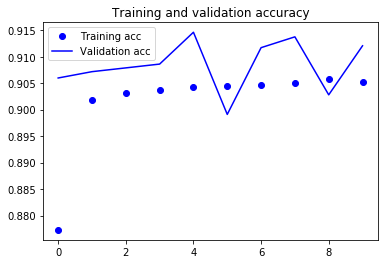

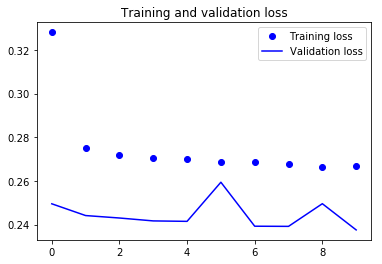

In [230]:
acc = res.history['acc']
val_acc = res.history['val_acc']
loss = res.history['loss']
val_loss = res.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()